# K-Meams Clustering
###### Created by Esmira Abdullaieva & Shovak Myroslav

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics 
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix


In [46]:
df = pd.read_csv('card.csv')

#### Correlation analysis

In [47]:
correlation = df.corr()
correlation.style.background_gradient(cmap='coolwarm')

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,1.000000,0.052886,0.677962,0.739329,0.406438,0.033916,-0.684125
Customer Key,0.052886,1.000000,0.068604,-0.010281,-0.000560,0.022506,0.005968
Avg_Credit_Limit,0.677962,0.068604,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.739329,-0.010281,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,0.406438,-0.000560,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.033916,0.022506,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.684125,0.005968,-0.414352,-0.651251,-0.506016,0.127299,1.000000


In [48]:
# removing weakly correlated data
df = df.drop_duplicates()
df = df.drop(['Sl_No', 'Customer Key'], axis=1)


## K-Means Clustering

In [49]:
#instantiate
scaler = StandardScaler()
#fit_transform
x_scaled = scaler.fit_transform(df)

### Calculation of inertias

In [50]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(init="random", n_clusters=k, n_init=10, max_iter=300, random_state=42)
    kmeans.fit(x_scaled)
    sse.append(kmeans.inertia_)

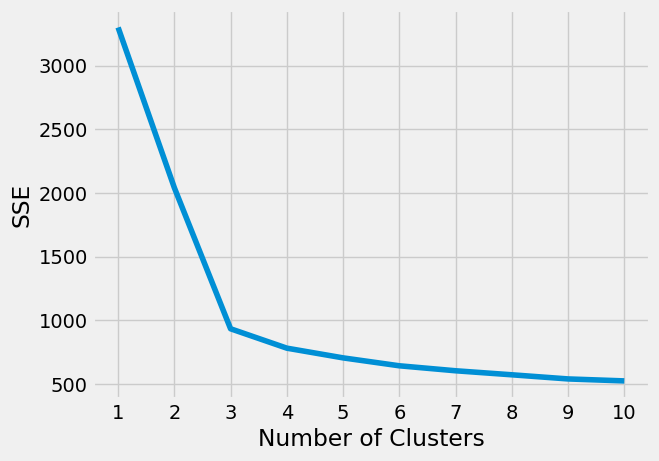

In [51]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

### The optimal number of clusters

In [52]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print(f'KL elbow: {kl.elbow}')

KL elbow: 3


### Silhouette coefficient

In [53]:
coefficients = []
for i in range(2, 11):
    kmeans2 = KMeans(init="random", n_clusters=i, n_init=10, max_iter=300, random_state=42)
    kmeans2.fit(x_scaled)
    score = silhouette_score(x_scaled, kmeans2.labels_)
    coefficients.append(score)

Text(0, 0.5, 'Silhouette Coefficient')

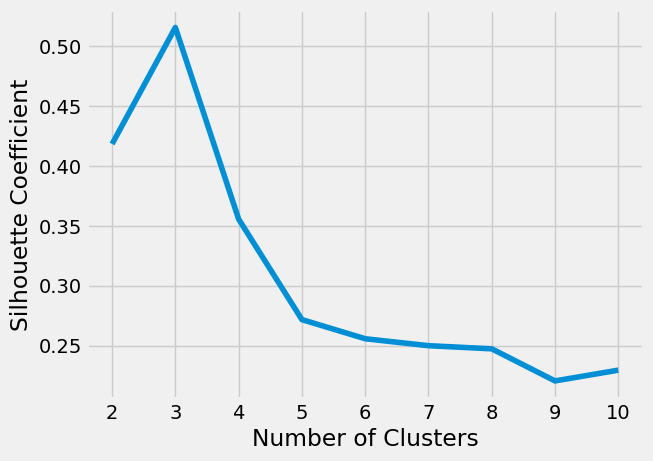

In [54]:
plt.figure()
plt.plot(range(2, 11), coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")

### The datapoints visualization 

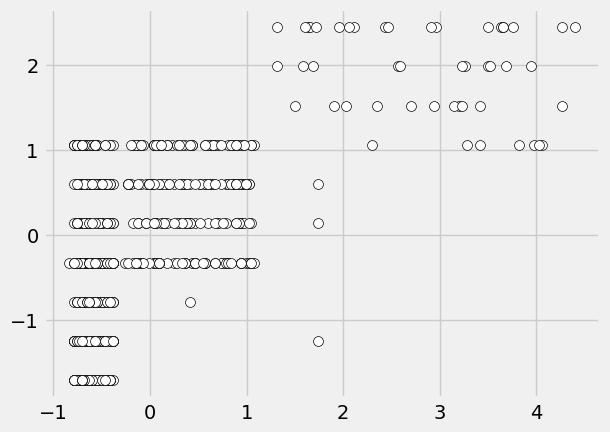

In [55]:
plt.scatter(
    x_scaled[:, 0], x_scaled[:, 1],
    c='white', marker='o',
    edgecolor='black', s=50
)
plt.show()

### K-means Clustering 

In [56]:
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)
kmeans.fit(x_scaled)
y_kmeans = kmeans.predict(x_scaled)

### The clusters visualization


Silhouette Score: 0.5157182558881063


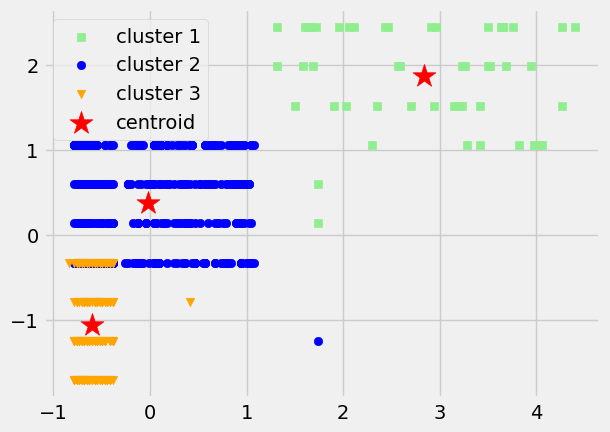

In [57]:
plt.scatter(
    x_scaled[kmeans.labels_ == 0, 0], 
    x_scaled[kmeans.labels_ == 0, 1],
    marker='s', c='lightgreen', label='cluster 1'
    )
plt.scatter(
    x_scaled[kmeans.labels_ == 1, 0], 
    x_scaled[kmeans.labels_ == 1, 1],
    marker='o', c='blue', label='cluster 2'
    )
plt.scatter(
    x_scaled[kmeans.labels_ == 2, 0], 
    x_scaled[kmeans.labels_ == 2, 1],
    marker='v', c='orange', label='cluster 3'
    )
plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], 
    marker='*', s=300,
    c='red', label='centroid'
    )

score = silhouette_score(x_scaled, y_kmeans)
print(f'Silhouette Score: {score}')

plt.legend()
plt.show()